In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("/home/gaurav/123ofAI/Assignments/Stroke_prediction/stroke_train_set.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,47.0,0,0,Yes,Private,Urban,63.98,26.8,smokes,0
1,Male,54.0,0,0,Yes,Private,Urban,86.26,35.1,formerly smoked,0
2,Female,3.0,0,0,No,children,Rural,68.34,18.0,Unknown,0
3,Female,62.0,0,0,Yes,Private,Rural,226.38,47.4,never smoked,0
4,Female,27.0,0,0,Yes,Private,Rural,85.60,21.4,Unknown,0


In [3]:
## 2. Check dataset info - field types, non-null values, dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4088 non-null   object 
 1   age                4088 non-null   float64
 2   hypertension       4088 non-null   int64  
 3   heart_disease      4088 non-null   int64  
 4   ever_married       4088 non-null   object 
 5   work_type          4088 non-null   object 
 6   Residence_type     4088 non-null   object 
 7   avg_glucose_level  4088 non-null   float64
 8   bmi                3926 non-null   float64
 9   smoking_status     4088 non-null   object 
 10  stroke             4088 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 351.4+ KB


In [4]:
#Pre-processing


# Fill missing values in 'bmi' with mean
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

# Drop duplicates rows
df1 = df.drop_duplicates()


# One-hot encoding for categorical variables
df2 = pd.get_dummies(df1, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], dtype=int)

In [5]:
df2.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,47.0,0,0,63.98,26.8,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,54.0,0,0,86.26,35.1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,3.0,0,0,68.34,18.0,0,1,0,0,1,...,0,0,0,1,1,0,1,0,0,0
3,62.0,0,0,226.38,47.4,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,27.0,0,0,85.60,21.4,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [6]:
#correlation between each features
df2.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.275365,0.261496,0.242190,0.314216,0.237228,0.017443,-0.017067,-0.011888,-0.679257,...,-0.070541,0.112160,0.320607,-0.632503,0.005835,-0.005835,-0.374886,0.230445,0.125586,0.068817
hypertension,0.275365,1.000000,0.116339,0.179432,0.164173,0.115834,-0.026764,0.026930,-0.005159,-0.164025,...,-0.019333,0.000415,0.112845,-0.129755,0.007570,-0.007570,-0.144115,0.060174,0.076938,0.017743
heart_disease,0.261496,0.116339,1.000000,0.179877,0.047138,0.140268,-0.082452,0.082578,-0.003757,-0.111474,...,-0.014081,0.003894,0.080707,-0.091346,-0.012205,0.012205,-0.064656,0.062759,-0.017285,0.039919
avg_glucose_level,0.242190,0.179432,0.179877,1.000000,0.177735,0.138229,-0.051340,0.050937,0.012854,-0.160589,...,-0.018339,0.016612,0.067363,-0.104448,0.005629,-0.005629,-0.103866,0.055403,0.035208,0.027294
bmi,0.314216,0.164173,0.047138,0.177735,1.000000,0.038844,0.017045,-0.016630,-0.013139,-0.322348,...,-0.013622,0.201130,0.069606,-0.440558,0.007868,-0.007868,-0.257525,0.096940,0.104169,0.087173
stroke,0.237228,0.115834,0.140268,0.138229,0.038844,1.000000,-0.002812,0.002924,-0.003548,-0.112674,...,-0.013296,0.008957,0.059626,-0.082579,-0.014647,0.014647,-0.050870,0.056813,-0.005205,0.012476
gender_Female,0.017443,-0.026764,-0.082452,-0.051340,0.017045,-0.002812,1.000000,-0.999496,-0.018614,-0.028105,...,-0.010248,0.016255,0.029122,-0.073157,-0.001513,0.001513,-0.047748,-0.055570,0.101653,-0.017275
gender_Male,-0.017067,0.026930,0.082578,0.050937,-0.016630,0.002924,-0.999496,1.000000,-0.013138,0.027425,...,0.010278,-0.016688,-0.028905,0.073359,0.001003,-0.001003,0.048080,0.054480,-0.101281,0.017489
gender_Other,-0.011888,-0.005159,-0.003757,0.012854,-0.013139,-0.003548,-0.018614,-0.013138,1.000000,0.021487,...,-0.000917,0.013574,-0.006901,-0.006154,0.016045,-0.016045,-0.010315,0.034472,-0.012015,-0.006702
ever_married_No,-0.679257,-0.164025,-0.111474,-0.160589,-0.322348,-0.112674,-0.028105,0.027425,0.021487,1.000000,...,0.080527,-0.145147,-0.191683,0.540475,0.000012,-0.000012,0.326451,-0.171839,-0.099457,-0.103115


<Axes: >

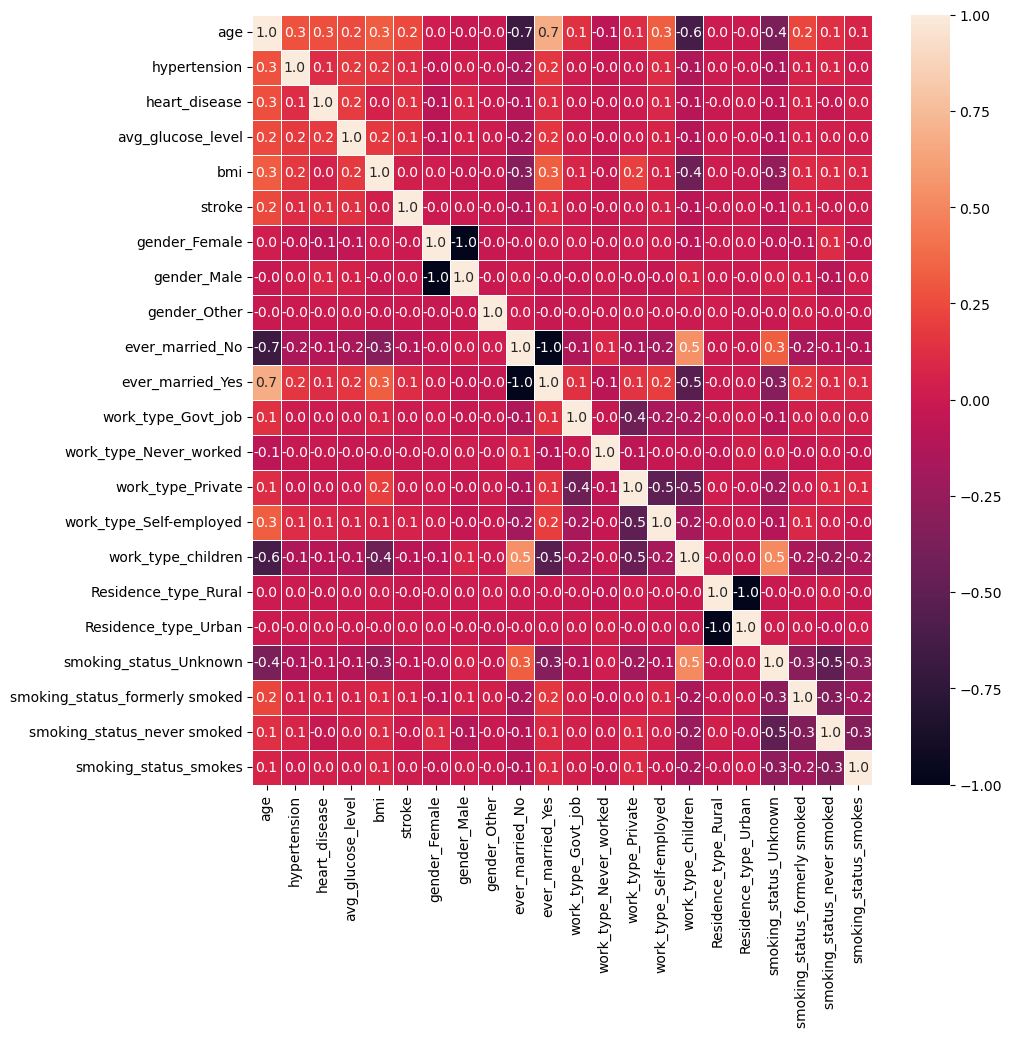

In [7]:
# correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [8]:
#Data understanding - Find out stats regarding your data 
df2.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,...,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000
mean,43.143395,0.098092,0.054550,106.098173,28.937061,0.048924,0.586106,0.413650,0.000245,0.346380,...,0.003425,0.570450,0.162916,0.134051,0.487280,0.512720,0.303082,0.170744,0.371086,0.155088
std,22.559356,0.297475,0.227127,45.313054,7.783361,0.215735,0.492590,0.492547,0.015640,0.475874,...,0.058427,0.495072,0.369334,0.340749,0.499899,0.499899,0.459647,0.376331,0.483155,0.362033
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.287500,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.400000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,114.027500,32.800000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,267.760000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Dropped three columns

df2 = df2.drop(['gender_Female','ever_married_No','Residence_type_Rural'], axis=1)

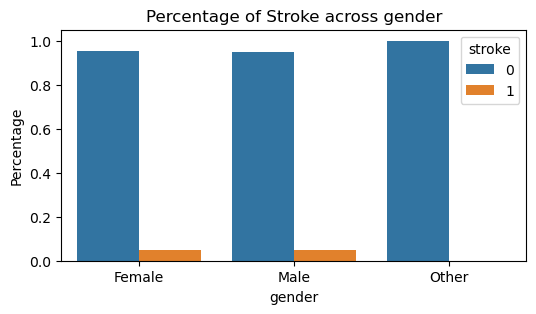

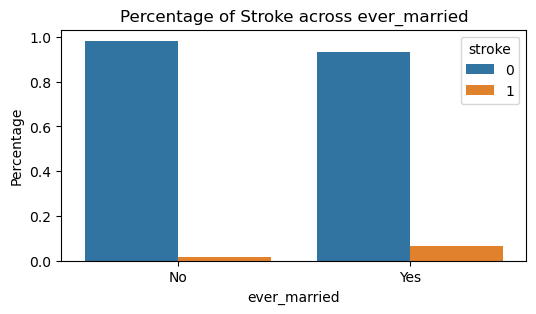

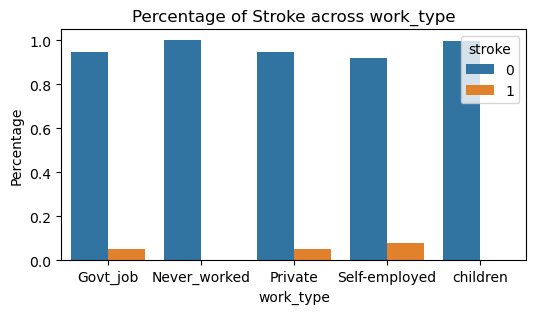

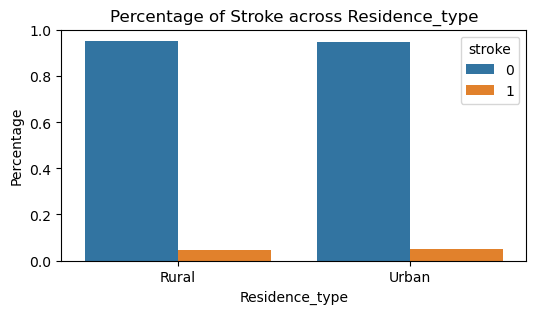

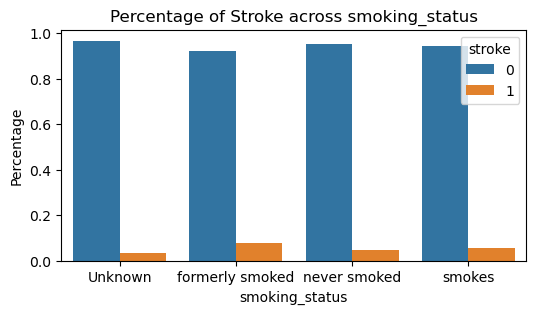

In [10]:
# Data understanding - Make use of plots to build more understanding of the data

# Ensure plots are displayed inline in the Jupyter Notebook
%matplotlib inline

# Visualize the percentage of 'stroke' across categorical features
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_columns:
    # Calculate the percentage of stroke for each category
    category_percentage = (
        df1.groupby([col, 'stroke']).size() / df1.groupby(col).size()
    ).reset_index(name='percentage')

    # Plot the percentages using Seaborn countplot
    plt.figure(figsize=(6,3))
    sns.barplot(x=col, y='percentage', hue='stroke', data=category_percentage)
    plt.title(f'Percentage of Stroke across {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.show()


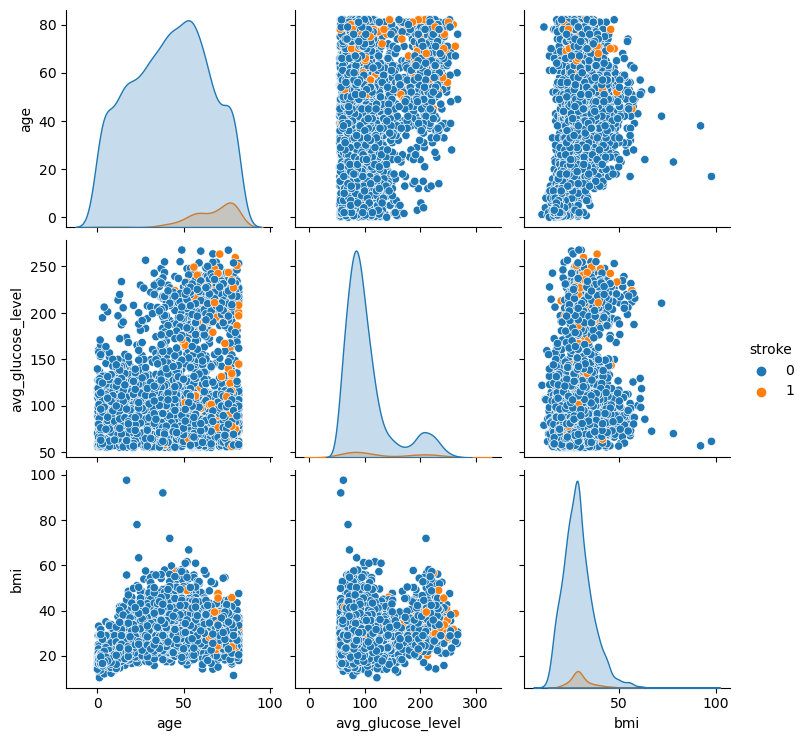

In [11]:
sns.pairplot(df2[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue='stroke')
plt.show()

# Model Development

Used dfferent model:
- KNN
- SVC
- Random Forest
- AbaBoost
- MLC

In [12]:
# KNN

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/home/gaurav/123ofAI/Assignments/Stroke_prediction/stroke_train_set.csv")


# Separate features and target variable
X = df2.drop(columns=['stroke'])
y = df2['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (optional but can be beneficial for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['int64', 'float64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['int64', 'float64']))

# Train the KNN model with class weight balancing for handling class imbalance
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       781
           1       0.00      0.00      0.00        37

    accuracy                           0.94       818
   macro avg       0.48      0.49      0.49       818
weighted avg       0.91      0.94      0.93       818


Confusion Matrix:
 [[771  10]
 [ 37   0]]


In [13]:
#SVC

from sklearn.svm import SVC

# Train the SVC model
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svc_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       781
           1       0.00      0.00      0.00        37

    accuracy                           0.95       818
   macro avg       0.48      0.50      0.49       818
weighted avg       0.91      0.95      0.93       818


Confusion Matrix:
 [[781   0]
 [ 37   0]]


/home/gaurav/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gaurav/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gaurav/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### After this realised there is data imbalance

In [14]:
# Use pareameter class_weight for this

# Train the SVC model
svc_model = SVC(class_weight= 'balanced')
svc_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svc_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.77      0.87       781
           1       0.12      0.68      0.21        37

    accuracy                           0.77       818
   macro avg       0.55      0.73      0.54       818
weighted avg       0.94      0.77      0.84       818


Confusion Matrix:
 [[605 176]
 [ 12  25]]


In [15]:
# Random forest


from sklearn.ensemble import RandomForestClassifier


# Train the Random Forest model with class weight balancing for handling class imbalance
clf = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')
clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       781
           1       0.33      0.03      0.05        37

    accuracy                           0.95       818
   macro avg       0.64      0.51      0.51       818
weighted avg       0.93      0.95      0.93       818


Confusion Matrix:
 [[779   2]
 [ 36   1]]


In [16]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier

# Train the AdaBoost model 
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = adaboost_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       781
           1       0.00      0.00      0.00        37

    accuracy                           0.95       818
   macro avg       0.48      0.50      0.49       818
weighted avg       0.91      0.95      0.93       818


Confusion Matrix:
 [[778   3]
 [ 37   0]]


In [17]:
# MLP

from sklearn.neural_network import MLPClassifier

#Train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled,y_train)

# Make prediction on test set
y_pred = mlp_model.predict(X_test_scaled)

#Evaluate the model
acuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       781
           1       0.08      0.03      0.04        37

    accuracy                           0.94       818
   macro avg       0.52      0.51      0.50       818
weighted avg       0.92      0.94      0.93       818


Confusion Matrix:
 [[769  12]
 [ 36   1]]


## Now use sampling for data imbalance

In [18]:
# KNN with sampling

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)

# Apply under-sampling
under_sampler = RandomUnderSampler(sampling_strategy=0.8, random_state=42)
X_train_final, y_train_final = under_sampler.fit_resample(X_train_resampled, y_train_resampled)

# Train the KNN model with sampling
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_model.fit(X_train_final, y_train_final)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.90       781
           1       0.10      0.38      0.16        37

    accuracy                           0.81       818
   macro avg       0.53      0.61      0.53       818
weighted avg       0.93      0.81      0.86       818


Confusion Matrix:
 [[652 129]
 [ 23  14]]


In [19]:
#SVC with sampling

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)

# Apply under-sampling
under_sampler = RandomUnderSampler(sampling_strategy=0.8, random_state=42)
X_train_final, y_train_final = under_sampler.fit_resample(X_train_resampled, y_train_resampled)


# Train the SVC model
svc_model = SVC(class_weight= 'balanced')
svc_model.fit(X_train_final, y_train_final)

# Make predictions on the test set
y_pred = svc_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.87       781
           1       0.13      0.65      0.21        37

    accuracy                           0.78       818
   macro avg       0.55      0.72      0.54       818
weighted avg       0.94      0.78      0.84       818


Confusion Matrix:
 [[615 166]
 [ 13  24]]


In [20]:
# Random Forest with sampling

# Apply over-sampling
#over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
#X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)

# Apply under-sampling
under_sampler = RandomUnderSampler(sampling_strategy=0.8, random_state=42)
X_train_final, y_train_final = under_sampler.fit_resample(X_train_scaled, y_train)


# Train the Random Forest model with class weight balancing for handling class imbalance
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train_final, y_train_final)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.73

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.84       781
           1       0.11      0.68      0.18        37

    accuracy                           0.73       818
   macro avg       0.54      0.70      0.51       818
weighted avg       0.94      0.73      0.81       818


Confusion Matrix:
 [[571 210]
 [ 12  25]]


In [21]:
# ADBoost with sampling

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)

# Apply under-sampling
under_sampler = RandomUnderSampler(sampling_strategy=0.8, random_state=42)
X_train_final, y_train_final = under_sampler.fit_resample(X_train_resampled, y_train_resampled)

# Train the AdaBoost model 
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train_final, y_train_final)

# Make predictions on the test set
y_pred = adaboost_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87       781
           1       0.12      0.65      0.20        37

    accuracy                           0.77       818
   macro avg       0.55      0.71      0.53       818
weighted avg       0.94      0.77      0.84       818


Confusion Matrix:
 [[606 175]
 [ 13  24]]


#  Feature Selection

In [22]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_classif, SelectKBest, RFE, chi2

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 0 to 4087
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4088 non-null   float64
 1   hypertension                    4088 non-null   int64  
 2   heart_disease                   4088 non-null   int64  
 3   avg_glucose_level               4088 non-null   float64
 4   bmi                             4088 non-null   float64
 5   stroke                          4088 non-null   int64  
 6   gender_Male                     4088 non-null   int64  
 7   gender_Other                    4088 non-null   int64  
 8   ever_married_Yes                4088 non-null   int64  
 9   work_type_Govt_job              4088 non-null   int64  
 10  work_type_Never_worked          4088 non-null   int64  
 11  work_type_Private               4088 non-null   int64  
 12  work_type_Self-employed         40

## Mutual Information Classification

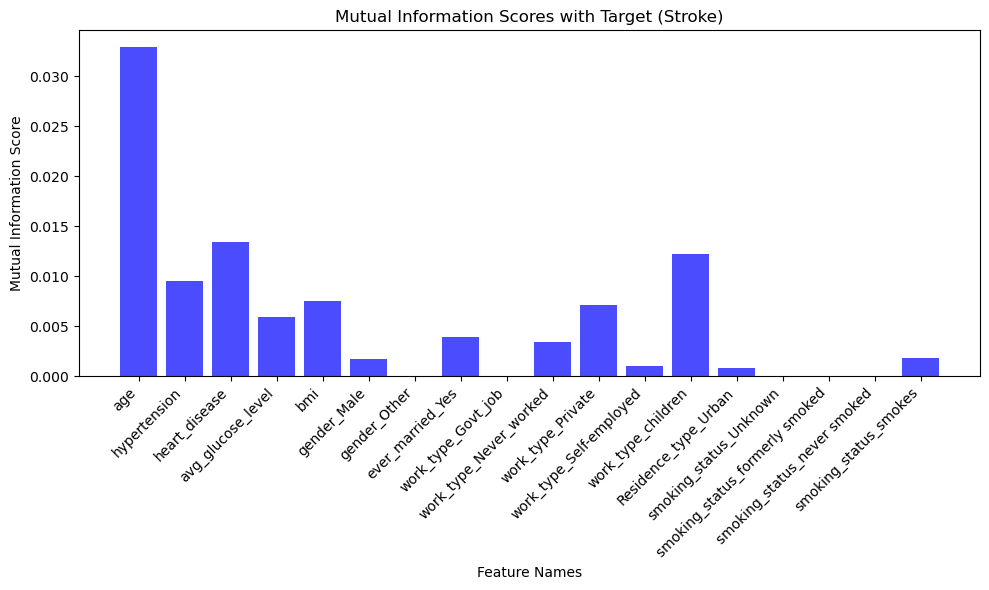

In [36]:
# Separate features and target variable
X1 = df2.drop(columns=['stroke'])
y1 = df2['stroke']

feature_names = X1.columns
mi_scores = mutual_info_classif(X1, y1)
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_names, mi_scores, color='blue', alpha=0.7)
plt.title('Mutual Information Scores with Target (Stroke)')
plt.xlabel('Feature Names')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.tight_layout()
plt.show()

## Chi2

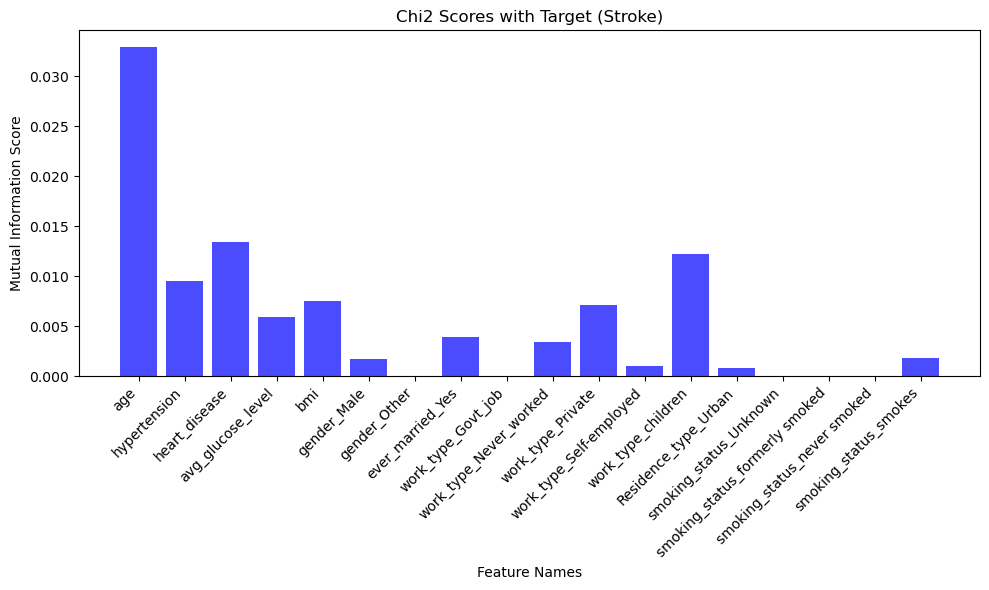

In [38]:
chi_score = chi2(X1,y1)

plt.figure(figsize=(10, 6))
plt.bar(feature_names, mi_scores, color='blue', alpha=0.7)
plt.title('Chi2 Scores with Target (Stroke)')
plt.xlabel('Feature Names')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.tight_layout()
plt.show()

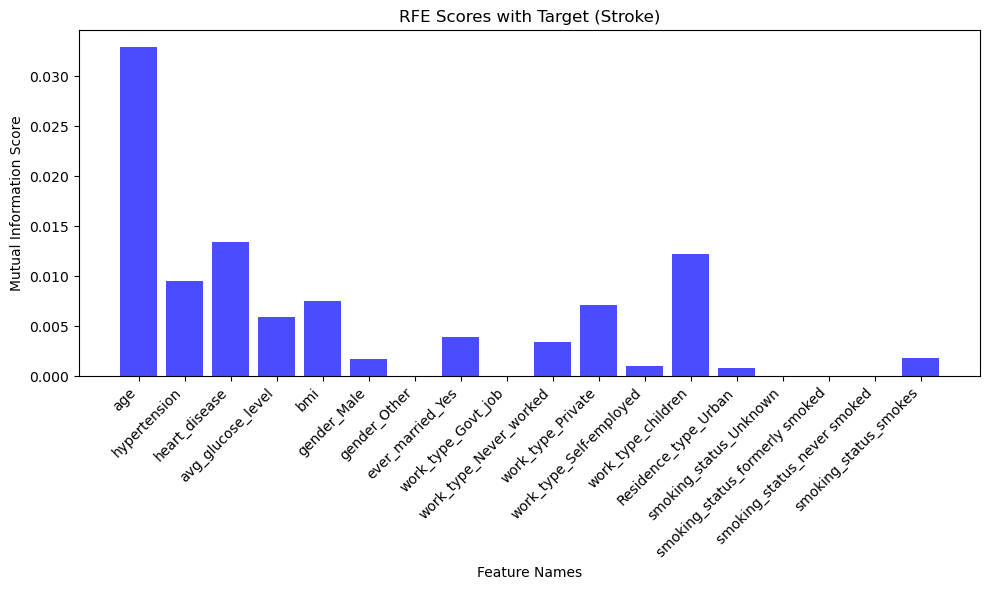

In [50]:
estimator = Lasso()
rfe_score = RFE(X1)

plt.figure(figsize=(10, 6))
plt.bar(feature_names, mi_scores, color='blue', alpha=0.7)
plt.title('RFE Scores with Target (Stroke)')
plt.xlabel('Feature Names')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.tight_layout()
plt.show()

In [44]:
# KNN with Mutual info

# Separate features and target variable
X = df2.drop(columns=['stroke'])
y = df2['stroke']

# Feature selection
selector = SelectKBest(mutual_info_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Get selected column names
selected_columns = X.columns[selector.get_support()]

# Create a DataFrame with selected columns
X_selected_df = pd.DataFrame(data=X_selected, columns=selected_columns)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)

# Apply under-sampling
under_sampler = RandomUnderSampler(sampling_strategy=0.8, random_state=42)
X_train_final, y_train_final = under_sampler.fit_resample(X_train_resampled, y_train_resampled)

# Train the KNN model with fetaure seletion
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_model.fit(X_train_final, y_train_final)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91       781
           1       0.12      0.41      0.19        37

    accuracy                           0.84       818
   macro avg       0.55      0.63      0.55       818
weighted avg       0.93      0.84      0.88       818


Confusion Matrix:
 [[674 107]
 [ 22  15]]


In [48]:
# KNN with chi2

# Separate features and target variable
X = df2.drop(columns=['stroke'])
y = df2['stroke']

# Feature selection
selector = SelectKBest(chi2, k=5)
X_selected = selector.fit_transform(X, y)

# Get selected column names
selected_columns = X.columns[selector.get_support()]

# Create a DataFrame with selected columns
X_selected_df = pd.DataFrame(data=X_selected, columns=selected_columns)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)

# Apply under-sampling
#under_sampler = RandomUnderSampler(sampling_strategy=0.8, random_state=42)
#X_train_final, y_train_final = under_sampler.fit_resample(X_train_resampled, y_train_resampled)

# Train the KNN model with fetaure seletion
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94       781
           1       0.10      0.22      0.14        37

    accuracy                           0.88       818
   macro avg       0.53      0.56      0.54       818
weighted avg       0.92      0.88      0.90       818


Confusion Matrix:
 [[712  69]
 [ 29   8]]


In [53]:
# KNN with RFE

# Separate features and target variable
X = df2.drop(columns=['stroke'])
y = df2['stroke']

# Feature Selection
estimator = Lasso()
selector = RFE(estimator, n_features_to_select=5, step=1).fit(X, y)
X_selected = selector.transform(X)

# Get selected column names
selected_columns = X.columns[selector.get_support()]

# Create a DataFrame with selected columns
X_selected_df = pd.DataFrame(data=X_selected, columns=selected_columns)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)


# Train the KNN model with fetaure seletion
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       781
           1       0.08      0.19      0.11        37

    accuracy                           0.87       818
   macro avg       0.52      0.54      0.52       818
weighted avg       0.92      0.87      0.89       818


Confusion Matrix:
 [[701  80]
 [ 30   7]]


In [55]:
# SVC with mutual info

# Separate features and target variable
X = df2.drop(columns=['stroke'])
y = df2['stroke']

# Feature selection
selector = SelectKBest(mutual_info_classif, k=8)
X_selected = selector.fit_transform(X, y)

# Get selected column names
selected_columns = X.columns[selector.get_support()]

# Create a DataFrame with selected columns
X_selected_df = pd.DataFrame(data=X_selected, columns=selected_columns)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)


# Train the SVC model
svc_model = SVC(class_weight= 'balanced')
svc_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = svc_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.84       781
           1       0.12      0.76      0.21        37

    accuracy                           0.74       818
   macro avg       0.55      0.75      0.52       818
weighted avg       0.95      0.74      0.81       818


Confusion Matrix:
 [[574 207]
 [  9  28]]


In [58]:
# SVC with chi2

# Separate features and target variable
X = df2.drop(columns=['stroke'])
y = df2['stroke']

# Feature selection
selector = SelectKBest(chi2, k=8)
X_selected = selector.fit_transform(X, y)

# Get selected column names
selected_columns = X.columns[selector.get_support()]

# Create a DataFrame with selected columns
X_selected_df = pd.DataFrame(data=X_selected, columns=selected_columns)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)


# Train the SVC model
svc_model = SVC(class_weight= 'balanced')
svc_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = svc_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.73

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.84       781
           1       0.12      0.73      0.20        37

    accuracy                           0.73       818
   macro avg       0.55      0.73      0.52       818
weighted avg       0.94      0.73      0.81       818


Confusion Matrix:
 [[574 207]
 [ 10  27]]


In [60]:
# SVC with RFE

# Separate features and target variable
X = df2.drop(columns=['stroke'])
y = df2['stroke']

# Feature Selection
estimator = Lasso()
selector = RFE(estimator, n_features_to_select=8, step=1).fit(X, y)
X_selected = selector.transform(X)

# Get selected column names
selected_columns = X.columns[selector.get_support()]

# Create a DataFrame with selected columns
X_selected_df = pd.DataFrame(data=X_selected, columns=selected_columns)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)


# Train the SVC model
svc_model = SVC(class_weight= 'balanced')
svc_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = svc_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.70

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.70      0.82       781
           1       0.11      0.78      0.19        37

    accuracy                           0.70       818
   macro avg       0.55      0.74      0.50       818
weighted avg       0.95      0.70      0.79       818


Confusion Matrix:
 [[543 238]
 [  8  29]]


In [62]:
# Random Forest with mutual info

# Separate features and target variable
X = df2.drop(columns=['stroke'])
y = df2['stroke']

# Feature selection
selector = SelectKBest(mutual_info_classif, k=8)
X_selected = selector.fit_transform(X, y)

# Get selected column names
selected_columns = X.columns[selector.get_support()]

# Create a DataFrame with selected columns
X_selected_df = pd.DataFrame(data=X_selected, columns=selected_columns)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)

# Train the Random Forest model with class weight balancing for handling class imbalance
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       781
           1       0.15      0.11      0.13        37

    accuracy                           0.93       818
   macro avg       0.56      0.54      0.55       818
weighted avg       0.92      0.93      0.93       818


Confusion Matrix:
 [[759  22]
 [ 33   4]]


In [64]:
# Random Forest with chi2

# Separate features and target variable
X = df2.drop(columns=['stroke'])
y = df2['stroke']

# Feature selection
selector = SelectKBest(chi2, k=8)
X_selected = selector.fit_transform(X, y)

# Get selected column names
selected_columns = X.columns[selector.get_support()]

# Create a DataFrame with selected columns
X_selected_df = pd.DataFrame(data=X_selected, columns=selected_columns)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)

# Train the Random Forest model with class weight balancing for handling class imbalance
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       781
           1       0.29      0.16      0.21        37

    accuracy                           0.94       818
   macro avg       0.62      0.57      0.59       818
weighted avg       0.93      0.94      0.94       818


Confusion Matrix:
 [[766  15]
 [ 31   6]]


In [66]:
# Random Forest with RFE

# Separate features and target variable
X = df2.drop(columns=['stroke'])
y = df2['stroke']

# Feature Selection
estimator = Lasso()
selector = RFE(estimator, n_features_to_select=8, step=1).fit(X, y)
X_selected = selector.transform(X)

# Get selected column names
selected_columns = X.columns[selector.get_support()]

# Create a DataFrame with selected columns
X_selected_df = pd.DataFrame(data=X_selected, columns=selected_columns)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)

# Train the Random Forest model with class weight balancing for handling class imbalance
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       781
           1       0.10      0.08      0.09        37

    accuracy                           0.92       818
   macro avg       0.53      0.52      0.52       818
weighted avg       0.92      0.92      0.92       818


Confusion Matrix:
 [[753  28]
 [ 34   3]]


In [68]:
# AdaBoost with mutual info

# Separate features and target variable
X = df2.drop(columns=['stroke'])
y = df2['stroke']

# Feature selection
selector = SelectKBest(mutual_info_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Get selected column names
selected_columns = X.columns[selector.get_support()]

# Create a DataFrame with selected columns
X_selected_df = pd.DataFrame(data=X_selected, columns=selected_columns)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)

# Train the AdaBoost model 
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = adaboost_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89       781
           1       0.13      0.54      0.21        37

    accuracy                           0.81       818
   macro avg       0.55      0.68      0.55       818
weighted avg       0.94      0.81      0.86       818


Confusion Matrix:
 [[644 137]
 [ 17  20]]


In [70]:
# AdaBoost with chi2

# Separate features and target variable
X = df2.drop(columns=['stroke'])
y = df2['stroke']

# Feature selection
selector = SelectKBest(chi2, k=8)
X_selected = selector.fit_transform(X, y)

# Get selected column names
selected_columns = X.columns[selector.get_support()]

# Create a DataFrame with selected columns
X_selected_df = pd.DataFrame(data=X_selected, columns=selected_columns)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)

# Train the AdaBoost model 
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = adaboost_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.90       781
           1       0.12      0.46      0.19        37

    accuracy                           0.82       818
   macro avg       0.54      0.65      0.54       818
weighted avg       0.93      0.82      0.87       818


Confusion Matrix:
 [[652 129]
 [ 20  17]]


In [75]:
# AdaBoost with RFE

# Separate features and target variable
X = df2.drop(columns=['stroke'])
y = df2['stroke']

# Feature selection
estimator = Lasso()
selector = RFE(estimator, n_features_to_select=8, step =1).fit(X,y)
X_selected = selector.transform(X)

# Get selected column names
selected_columns = X.columns[selector.get_support()]

# Create a DataFrame with selected columns
X_selected_df = pd.DataFrame(data=X_selected, columns=selected_columns)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)

# Train the AdaBoost model 
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = adaboost_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.90       781
           1       0.14      0.57      0.23        37

    accuracy                           0.83       818
   macro avg       0.56      0.70      0.57       818
weighted avg       0.94      0.83      0.87       818


Confusion Matrix:
 [[657 124]
 [ 16  21]]


In [79]:
# MLP with mutual info

# Separate features and target variable
X = df2.drop(columns=['stroke'])
y = df2['stroke']

# Feature selection
selector = SelectKBest(mutual_info_classif, k=8)
X_selected = selector.fit_transform(X,y)

# Get selected column names
selected_columns = X.columns[selector.get_support()]

# Create a DataFrame with selected columns
X_selected_df = pd.DataFrame(data=X_selected, columns=selected_columns)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)

#Train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, random_state=42)
mlp_model.fit(X_train_resampled,y_train_resampled)

# Make prediction on test set
y_pred = mlp_model.predict(X_test_scaled)

#Evaluate the model
acuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Make predictions on the test set
y_pred = mlp_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       781
           1       0.15      0.46      0.23        37

    accuracy                           0.86       818
   macro avg       0.56      0.67      0.57       818
weighted avg       0.93      0.86      0.89       818


Confusion Matrix:
 [[685  96]
 [ 20  17]]
Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       781
           1       0.15      0.46      0.23        37

    accuracy                           0.86       818
   macro avg       0.56      0.67      0.57       818
weighted avg       0.93      0.86      0.89       818


Confusion Matrix:
 [[685  96]
 [ 20  17]]


In [81]:
# MLP with mutual info

# Separate features and target variable
X = df2.drop(columns=['stroke'])
y = df2['stroke']

# Feature selection
selector = SelectKBest(chi2, k=8)
X_selected = selector.fit_transform(X,y)

# Get selected column names
selected_columns = X.columns[selector.get_support()]

# Create a DataFrame with selected columns
X_selected_df = pd.DataFrame(data=X_selected, columns=selected_columns)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)

#Train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, random_state=42)
mlp_model.fit(X_train_resampled,y_train_resampled)

# Make prediction on test set
y_pred = mlp_model.predict(X_test_scaled)

#Evaluate the model
acuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Make predictions on the test set
y_pred = mlp_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91       781
           1       0.16      0.57      0.24        37

    accuracy                           0.84       818
   macro avg       0.57      0.71      0.58       818
weighted avg       0.94      0.84      0.88       818


Confusion Matrix:
 [[667 114]
 [ 16  21]]
Accuracy: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91       781
           1       0.16      0.57      0.24        37

    accuracy                           0.84       818
   macro avg       0.57      0.71      0.58       818
weighted avg       0.94      0.84      0.88       818


Confusion Matrix:
 [[667 114]
 [ 16  21]]


In [84]:
# MLP with mutual info

# Separate features and target variable
X = df2.drop(columns=['stroke'])
y = df2['stroke']

# Feature selection
estimator = Lasso()
selector = RFE(estimator,n_features_to_select=8,step=1).fit(X,y)
X_selected = selector.transform(X)

# Get selected column names
selected_columns = X.columns[selector.get_support()]

# Create a DataFrame with selected columns
X_selected_df = pd.DataFrame(data=X_selected, columns=selected_columns)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)

#Train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, random_state=42)
mlp_model.fit(X_train_resampled,y_train_resampled)

# Make prediction on test set
y_pred = mlp_model.predict(X_test_scaled)

#Evaluate the model
acuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Make predictions on the test set
y_pred = mlp_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89       781
           1       0.13      0.57      0.21        37

    accuracy                           0.81       818
   macro avg       0.55      0.69      0.55       818
weighted avg       0.94      0.81      0.86       818


Confusion Matrix:
 [[638 143]
 [ 16  21]]
Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89       781
           1       0.13      0.57      0.21        37

    accuracy                           0.81       818
   macro avg       0.55      0.69      0.55       818
weighted avg       0.94      0.81      0.86       818


Confusion Matrix:
 [[638 143]
 [ 16  21]]


# Hyperparameter Tuning

In [86]:
# KNN with hyperparameter

from sklearn.model_selection import RandomizedSearchCV

# Separate features and target variable
X = df2.drop(columns=['stroke'])
y = df2['stroke']

# Feature selection
selector = SelectKBest(chi2,k=5)
X_selected = selector.fit_transform(X,y)

# Get selected column names
selected_columns = X.columns[selector.get_support()]

# Create a DataFrame with selected columns
X_selected_df = pd.DataFrame(data=X_selected, columns=selected_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)

# Define the parameter distribution for randomized search
param_dist = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Create the SVC model
knn_model = KNeighborsClassifier()

# Perform randomized search
randomized_search = RandomizedSearchCV(knn_model, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
randomized_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params_random = randomized_search.best_params_
print(f'Best Hyperparameters (Randomized): {best_params_random}')

# Make predictions on the test set using the best model
best_model_random = randomized_search.best_estimator_
y_pred_random = best_model_random.predict(X_test_scaled)

# Evaluate the best model from randomized search
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f'Accuracy with Best Model (Randomized): {accuracy_random:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred_random))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred_random))

Best Hyperparameters (Randomized): {'weights': 'distance', 'p': 1, 'n_neighbors': 3}
Accuracy with Best Model (Randomized): 0.90

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       781
           1       0.17      0.30      0.22        37

    accuracy                           0.90       818
   macro avg       0.57      0.61      0.58       818
weighted avg       0.93      0.90      0.91       818


Confusion Matrix:
 [[727  54]
 [ 26  11]]


In [88]:
#SVC with hyper

# Separate features and target variable
X = df2.drop(columns=['stroke'])
y = df2['stroke']

# Feature selection
selector = SelectKBest(chi2,k=5)
X_selected = selector.fit_transform(X,y)

# Get selected column names
selected_columns = X.columns[selector.get_support()]

# Create a DataFrame with selected columns
X_selected_df = pd.DataFrame(data=X_selected, columns=selected_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)

# Define the parameter distribution for randomized search
param_dist = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}

# Create the SVC model
svc_model = SVC()

# Perform randomized search
randomized_search = RandomizedSearchCV(svc_model, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
randomized_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params_random = randomized_search.best_params_
print(f'Best Hyperparameters (Randomized): {best_params_random}')

# Make predictions on the test set using the best model
best_model_random = randomized_search.best_estimator_
y_pred_random = best_model_random.predict(X_test_scaled)

# Evaluate the best model from randomized search
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f'Accuracy with Best Model (Randomized): {accuracy_random:.2f}')

# Display classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred_random))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred_random))

Best Hyperparameters (Randomized): {'kernel': 'rbf', 'gamma': 1, 'C': 100}
Accuracy with Best Model (Randomized): 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91       781
           1       0.14      0.49      0.21        37

    accuracy                           0.84       818
   macro avg       0.55      0.67      0.56       818
weighted avg       0.93      0.84      0.88       818


Confusion Matrix:
 [[668 113]
 [ 19  18]]


In [89]:
# random Forest with hyper

# Separate features and target variable
X = df2.drop(columns=['stroke'])
y = df2['stroke']

# Feature selection
selector = SelectKBest(chi2, k=5)
X_selected = selector.fit_transform(X, y)

# Get selected column names
selected_columns = X.columns[selector.get_support()]

# Create a DataFrame with selected columns
X_selected_df = pd.DataFrame(data=X_selected, columns=selected_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)

# Define the parameter distribution for randomized search for Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the Random Forest model
rf_model = RandomForestClassifier()

# Perform randomized search for Random Forest
randomized_search_rf = RandomizedSearchCV(rf_model, param_dist_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
randomized_search_rf.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters for Random Forest
best_params_random_rf = randomized_search_rf.best_params_
print(f'Best Hyperparameters (Randomized - Random Forest): {best_params_random_rf}')

# Make predictions on the test set using the best Random Forest model
best_model_random_rf = randomized_search_rf.best_estimator_
y_pred_random_rf = best_model_random_rf.predict(X_test_scaled)

# Evaluate the best Random Forest model from randomized search
accuracy_random_rf = accuracy_score(y_test, y_pred_random_rf)
print(f'Accuracy with Best Model (Randomized - Random Forest): {accuracy_random_rf:.2f}')

# Display classification report and confusion matrix for Random Forest
print('\nClassification Report (Random Forest):\n', classification_report(y_test, y_pred_random_rf))
print('\nConfusion Matrix (Random Forest):\n', confusion_matrix(y_test, y_pred_random_rf))

Best Hyperparameters (Randomized - Random Forest): {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}
Accuracy with Best Model (Randomized - Random Forest): 0.92

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       781
           1       0.15      0.16      0.16        37

    accuracy                           0.92       818
   macro avg       0.56      0.56      0.56       818
weighted avg       0.92      0.92      0.92       818


Confusion Matrix (Random Forest):
 [[748  33]
 [ 31   6]]


In [90]:
# AdaBoost with hyper

# Separate features and target variable
X = df2.drop(columns=['stroke'])
y = df2['stroke']

# Feature selection
selector = SelectKBest(chi2, k=5)
X_selected = selector.fit_transform(X, y)

# Get selected column names
selected_columns = X.columns[selector.get_support()]

# Create a DataFrame with selected columns
X_selected_df = pd.DataFrame(data=X_selected, columns=selected_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)

# Define the parameter distribution for randomized search for AdaBoost
param_dist_adaboost = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1.0, 2.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Create the AdaBoost model
adaboost_model = AdaBoostClassifier()

# Perform randomized search for AdaBoost
randomized_search_adaboost = RandomizedSearchCV(adaboost_model, param_dist_adaboost, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
randomized_search_adaboost.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters for AdaBoost
best_params_random_adaboost = randomized_search_adaboost.best_params_
print(f'Best Hyperparameters (Randomized - AdaBoost): {best_params_random_adaboost}')

# Make predictions on the test set using the best AdaBoost model
best_model_random_adaboost = randomized_search_adaboost.best_estimator_
y_pred_random_adaboost = best_model_random_adaboost.predict(X_test_scaled)

# Evaluate the best AdaBoost model from randomized search
accuracy_random_adaboost = accuracy_score(y_test, y_pred_random_adaboost)
print(f'Accuracy with Best Model (Randomized - AdaBoost): {accuracy_random_adaboost:.2f}')

# Display classification report and confusion matrix for AdaBoost
print('\nClassification Report (AdaBoost):\n', classification_report(y_test, y_pred_random_adaboost))
print('\nConfusion Matrix (AdaBoost):\n', confusion_matrix(y_test, y_pred_random_adaboost))

Best Hyperparameters (Randomized - AdaBoost): {'n_estimators': 300, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'}
Accuracy with Best Model (Randomized - AdaBoost): 0.83

Classification Report (AdaBoost):
               precision    recall  f1-score   support

           0       0.98      0.84      0.91       781
           1       0.15      0.59      0.24        37

    accuracy                           0.83       818
   macro avg       0.57      0.72      0.57       818
weighted avg       0.94      0.83      0.88       818


Confusion Matrix (AdaBoost):
 [[659 122]
 [ 15  22]]


In [91]:
# MLP with hyper

# Separate features and target variable
X = df2.drop(columns=['stroke'])
y = df2['stroke']

# Feature selection
selector = SelectKBest(chi2, k=5)
X_selected = selector.fit_transform(X, y)

# Get selected column names
selected_columns = X.columns[selector.get_support()]

# Create a DataFrame with selected columns
X_selected_df = pd.DataFrame(data=X_selected, columns=selected_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train_scaled, y_train)

# Define the parameter distribution for randomized search for MLP
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Create the MLP model
mlp_model = MLPClassifier()

# Perform randomized search for MLP
randomized_search_mlp = RandomizedSearchCV(mlp_model, param_dist_mlp, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
randomized_search_mlp.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters for MLP
best_params_random_mlp = randomized_search_mlp.best_params_
print(f'Best Hyperparameters (Randomized - MLP): {best_params_random_mlp}')

# Make predictions on the test set using the best MLP model
best_model_random_mlp = randomized_search_mlp.best_estimator_
y_pred_random_mlp = best_model_random_mlp.predict(X_test_scaled)

# Evaluate the best MLP model from randomized search
accuracy_random_mlp = accuracy_score(y_test, y_pred_random_mlp)
print(f'Accuracy with Best Model (Randomized - MLP): {accuracy_random_mlp:.2f}')

# Display classification report and confusion matrix for MLP
print('\nClassification Report (MLP):\n', classification_report(y_test, y_pred_random_mlp))
print('\nConfusion Matrix (MLP):\n', confusion_matrix(y_test, y_pred_random_mlp))

/home/gaurav/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gaurav/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gaurav/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gaurav/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/gaurav/anaconda3/lib/python3.1

Best Hyperparameters (Randomized - MLP): {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100, 50), 'alpha': 0.01, 'activation': 'tanh'}
Accuracy with Best Model (Randomized - MLP): 0.82

Classification Report (MLP):
               precision    recall  f1-score   support

           0       0.98      0.83      0.90       781
           1       0.16      0.70      0.26        37

    accuracy                           0.82       818
   macro avg       0.57      0.76      0.58       818
weighted avg       0.95      0.82      0.87       818


Confusion Matrix (MLP):
 [[645 136]
 [ 11  26]]


/home/gaurav/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Code for test data and print CSV output

In [ ]:
# Creating output file for submission - Template Code

test_pd = pd.read_csv('/home/gaurav/123ofAI/Assignments/Stroke_prediction/stroke_test_set_nogt.csv')

# saving in a new variable to modify
test = test_pd.copy(deep=True)


# Prepare data to be given as an input to your trained model
# 1. Repeat the pre-processing done above. Eg: Conversion to categorical, filling in mean values
test['bmi'].fillna(test['bmi'].mean(), inplace=True)
test = pd.get_dummies(test,dtype=int)


missing_cols = set(X.columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0

    
# 2. Use the same features obtained in feature selection
chosen_features = selected_columns
test = test[chosen_features]


# 3. Normalise/Scale the features as done above
# Separate features and target variable

scaler = StandardScaler()
test = scaler.fit_transform(test.select_dtypes(include=['int64', 'float64']))


# 4. Predict and obtain results from the model
y_pred = svc_model.predict(test)

# 5. Save results to CSV
submission = pd.DataFrame({'ID': test_pd.index, 'stroke' : y_pred})
submission.to_csv('output_submission_eval_svc_feature.csv', index=False)